In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [29]:
## (a) Generaate 50 datat points for sinc function in range [-3, 3]
random_data = np.linspace(-3, 3, 50)
sinc_random_data = np.sinc(random_data)

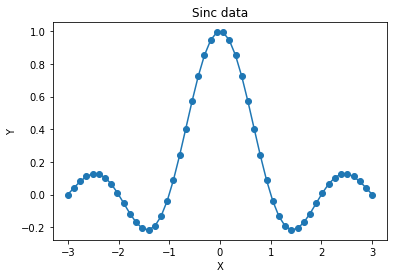

In [30]:
## Visualizing the data
plt.plot(random_data, sinc_random_data, marker="o")
plt.title("Sinc data")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [31]:
## (b) Adding Gaussian noise to data using numpy function
noise = np.random.normal(loc=random_data.mean(), scale=1, size=random_data.size)
signal_with_noise = sinc_random_data + noise

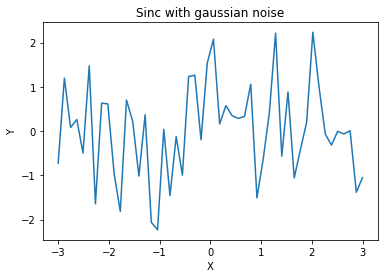

In [32]:
# Plot of the signal with gaussian function
plt.plot(random_data, signal_with_noise)
plt.title("Sinc with gaussian noise")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [33]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(random_data,
                                                    signal_with_noise,
                                                    test_size=0.25,
                                                    random_state=42,)

In [34]:
# Utilizing as SVR with RBF kernel due to similarities to Gaussian distribution which was used for noise
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(y_test)
print(y_pred)

[-0.1947988   0.00588254  0.33412691  0.20489903  0.22412665 -0.19883187
  0.27546056  0.08979558 -0.1780944   0.14991344  0.29637666 -0.02981654
  0.40023658]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
accuracy = model.score(y_test, y_pred)
print(accuracy)

1.0
